In [1]:

import pandas as pd
from matplotlib import pyplot as plt 
import chart_studio.plotly as py
import plotly.graph_objs as go

In [13]:


%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
dataset= pd.read_csv("https://raw.githubusercontent.com/fabriziocominetti/Data-Science-UnimiB/main/Data%20Visualization/compitino_dataviz_2021_2022.csv")
dataset.head()

,nome_modulistica,score_preop,score_postop,condizioni_meteo,sesso,anni_ricovero,temperatura_media,umidita_media,HI > 27,natural_light
0,SF12 PhysicalScore,27.60,37.40,poco nuvoloso,F,70,20.0,69.0,False,True
1,SF12 MentalScore,54.36,58.46,poco nuvoloso,F,70,20.0,69.0,False,True
2,SF12 PhysicalScore,28.15,38.25,poco nuvoloso,M,69,18.0,65.0,False,True
3,SF12 MentalScore,57.02,64.62,poco nuvoloso,M,69,18.0,65.0,False,True
4,SF12 PhysicalScore,31.57,55.67,poco nuvoloso,M,70,23.0,74.0,False,True


In [3]:
dataset.tail()

,nome_modulistica,score_preop,score_postop,condizioni_meteo,sesso,anni_ricovero,temperatura_media,umidita_media,HI > 27,natural_light
2105,SF12 MentalScore,57.54,62.34,nebbia al mattino,M,70,20.0,71.0,True,True
2106,SF12 PhysicalScore,32.20,37.10,nebbia al mattino,F,56,20.0,71.0,True,True
2107,SF12 MentalScore,48.84,50.94,nebbia al mattino,F,56,20.0,71.0,True,True
2108,SF12 PhysicalScore,36.47,43.47,sereno,M,69,23.0,55.0,False,True
2109,SF12 MentalScore,51.70,60.20,sereno,M,69,23.0,55.0,False,True


In [19]:
dataset["t_media > 22"] = dataset["temperatura_media"] > 22

In [20]:
dataset.head()

,nome_modulistica,score_preop,score_postop,condizioni_meteo,sesso,anni_ricovero,temperatura_media,umidita_media,HI > 27,natural_light,t_media > 22
0,SF12 PhysicalScore,27.60,37.40,poco nuvoloso,F,70,20.0,69.0,False,True,False
1,SF12 MentalScore,54.36,58.46,poco nuvoloso,F,70,20.0,69.0,False,True,False
2,SF12 PhysicalScore,28.15,38.25,poco nuvoloso,M,69,18.0,65.0,False,True,False
3,SF12 MentalScore,57.02,64.62,poco nuvoloso,M,69,18.0,65.0,False,True,False
4,SF12 PhysicalScore,31.57,55.67,poco nuvoloso,M,70,23.0,74.0,False,True,True


In [ ]:
dataset['anni_ricovero'].max()

In [ ]:
dataset['anni_ricovero'].min()

In [ ]:
dataset.shape

In [14]:
import plotly.express as px
fig = px.scatter(dataset, x="umidita_media", y="score_postop", color="sesso", color_discrete_map={"F":"rgba(255, 0, 0, 0.5)", "M":'rgba(99, 110, 250, 0.5)'})
fig.show()

In [22]:
import plotly.express as px
fig = px.box(dataset, x="condizioni_meteo", y="score_postop")
fig.show()

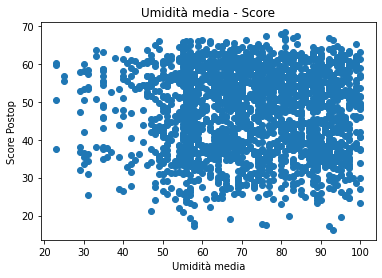

In [33]:
plt.scatter(dataset["umidita_media"], dataset["score_postop"])
plt.title("Umidità media - Score")
plt.xlabel("Umidità media")
plt.ylabel("Score Postop")
plt.show()

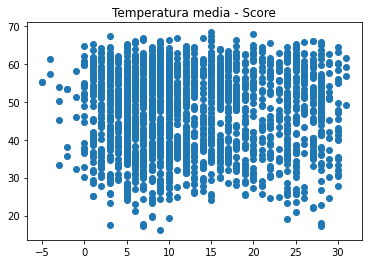

In [32]:
plt.scatter(dataset["temperatura_media"], dataset["score_postop"])
plt.title("Temperatura media - Score")
plt.show()